In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
df = pd.read_csv("final_named_data.csv", index_col='id')
df.head()

,Unnamed: 0,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,76,77,78,81,84,85,86,87,88,name
id,,,,,,,,,,,,,,,,,,,,,
1,0,15943882.0,63,1,NaN,NaN,NaN,NaN,1.0,145.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,name
2,1,15964847.0,67,1,NaN,NaN,NaN,NaN,4.0,160.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,name
3,2,15952199.0,67,1,NaN,NaN,NaN,NaN,4.0,120.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,name
4,3,15929464.0,37,1,NaN,NaN,NaN,NaN,3.0,130.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,name
6,4,11961207.0,41,0,NaN,NaN,NaN,NaN,2.0,130.0,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,name


In [62]:
df.shape

(1541, 83)

In [63]:
df = df.drop(['Unnamed: 0', 'name'], axis=1)
df.head()

,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,...,75,76,77,78,81,84,85,86,87,88
id,,,,,,,,,,,,,,,,,,,,,
1,15943882.0,63,1,NaN,NaN,NaN,NaN,1.0,145.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,15964847.0,67,1,NaN,NaN,NaN,NaN,4.0,160.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
3,15952199.0,67,1,NaN,NaN,NaN,NaN,4.0,120.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
4,15929464.0,37,1,NaN,NaN,NaN,NaN,3.0,130.0,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
6,11961207.0,41,0,NaN,NaN,NaN,NaN,2.0,130.0,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0


# narazie troche na brudno :)

- 'ccf' - social security number -> to drop


- 'num' - target

- ekgmo - month of exercise ECG reading
- ekgday - day of exercise ECG reading
- ekgyr - year of exercise ECG reading

'27' -> proto: exercise protocol

          1 = Bruce     
          2 = Kottus
          3 = McHenry
          4 = fast Balke
          5 = Balke
          6 = Noughton 
          7 = bike 150 kpa min/min  (Not sure if "kpa min/min" is what was written!)
          8 = bike 125 kpa min/min  
          9 = bike 100 kpa min/min
         10 = bike 75 kpa min/min
         11 = bike 50 kpa min/min
         12 = arm ergometer

In [68]:
df = df.drop(['ccf'], axis=1)

In [65]:
df.rename(columns={'27':'proto'}, inplace=True)

In [66]:
for col in df.columns:
    print(f"{col}: {df[col].unique()}")

ccf: [1.5943882e+07 1.5964847e+07 1.5952199e+07 ... 2.2803000e+04 1.4205000e+04
 1.5403000e+04]
age: [63 67 37 41 56 62 57 53 44 52 48 54 49 64 58 60 50 66 43 40 69 59 42 55
 61 65 71 51 46 45 39 68 47 34 35 29 70 77 38 74 76 36 32 31 33 28 30 27
 20 26 25 72 75 73 78]
sex: [1 0]
painloc: [nan  1.  0.]
painexer: [nan  0.  1.]
relrest: [nan  0.  1.]
pncaden: [nan  1.  3.  2.  0.]
cp: [ 1.  4.  3.  2. nan]
trestbps: [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164. 113. 190.  92.  98.  nan 162.
  90.  95. 127. 149. 116.  96. 187. 137.  80.]
htn: [ 1.  0. nan]
chol: [233.    286.    229.    250.    204.    236.    268.    354.    254.
 203.    192.    294.    256.    263.    199.    168.    239.    275.
 266.    211.    283.    284.    224.    206.    219.    340.    226.
 247.    167.   

In [67]:
categorcial = ['sex', 'painloc', 'painexer', 'relrest', 'cp', 'htn', 'smoke', 'fbs', 'dm', 'famhist', 'recteg', 'dig', 'prop', 'nitr', 'pro', 'diuretic', 'proto', 'exang', 'xhypo', 'slope', 'ca', 'exerckm']   
numeric = ['age', 'trestbps', 'chol', 'cigs', 'years', 'thaldur', 'thaltime', 'met', 'thalach', 'thalrest', 'tpeakbps', 'trestbpd', 'oldpeak', 'rldv5', 'rldv5e', 'restckm']
# skończyłam na restckm -> dokończyć

In [69]:
df['num'].unique()

array([0, 2, 1, 3, 4])

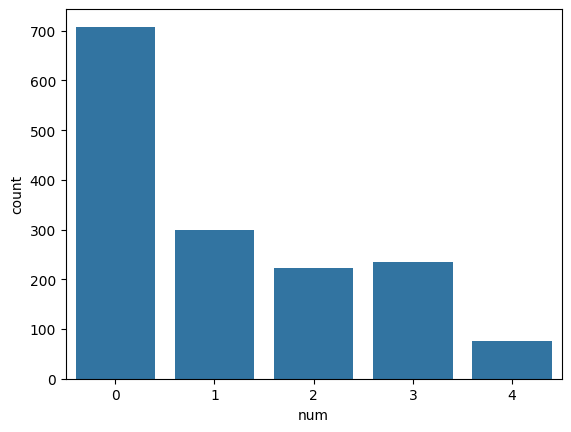

In [70]:
sns.countplot(x=df['num'])
plt.show()

There is a noticeable imbalance in the data, with the majority of records representing healthy patients and the fewest corresponding to those in the most severe stage.

<Axes: xlabel='sex', ylabel='count'>

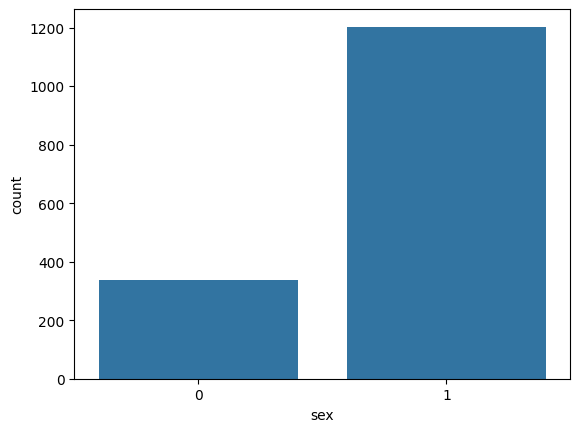

In [71]:
sns.countplot(x='sex', data=df)

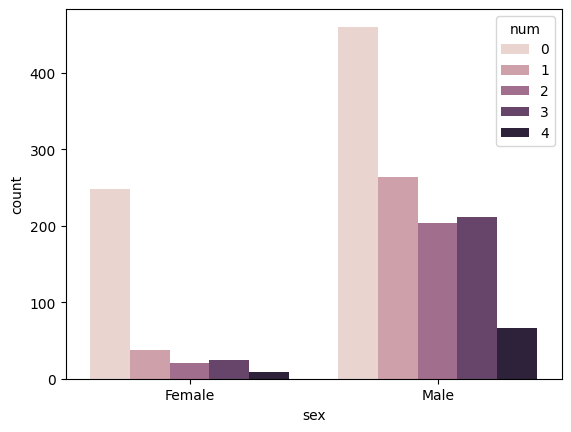

In [72]:
sns.countplot(x='sex', hue='num', data=df)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

In [73]:
len(numeric)

16

In [75]:
len(df.columns)

80

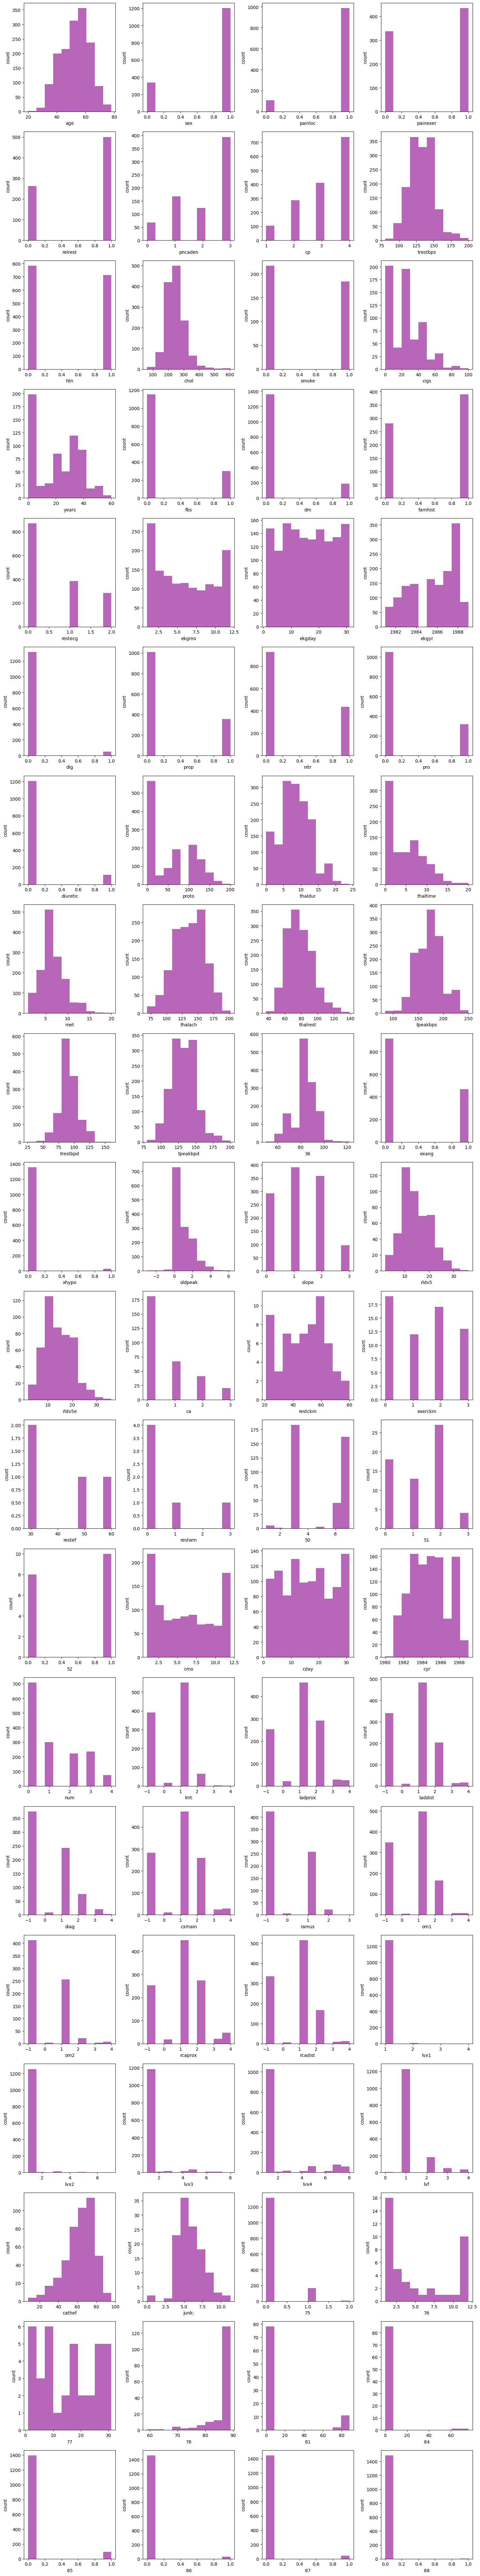

In [86]:
plt.figure(figsize=(15,80))
for i, col in enumerate(df.columns):
    plt.subplot(20, 4, i+1)
    plt.hist(df[col], color='darkmagenta', alpha=0.6)
    plt.xlabel(col)
    plt.ylabel('count')
plt.tight_layout()